In [1]:
%%capture

import numpy as np
import xarray as xr
import pandas as pd
import scipy
import gdal
from scipy.ndimage.filters import uniform_filter
from scipy import ndimage
from scipy.ndimage.filters import *
import os
import math
from osgeo import osr
from fractions import Fraction
import timeit
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
%matplotlib inline
import random
# import plotting tools
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib as mpl

def map_to_sinewave(data, center, boundary):
    distance = np.maximum(center - np.sqrt((data - center)**2), boundary)
    mapped_values = 1 - np.sin(np.pi + (10*(distance - center)*(np.pi /6)))
    return mapped_values

def Nxtp(x, t, p):
    """Takes a DEM derivative (x, such as slope or elevation percentile 
       and maps it onto the range [0,1] using a non-linear equation with a shape 
       parameter (t) and a threshold parameter (p)"""
    standardise_value = 1/(1+(x/t)**p)
    print (x)
    print (t)
    print (p)
    return standardise_value


In [102]:
%%capture
# Initial data.
data = np.arange(0,1.005,.005)
# Target slope position.
t = 0.4
# Setting distance to 0 in each direction.
a = t - 0.3
#Map values to sine wave.
x = map_to_sinewave(data, t, a)
# Here the threshold values must always be 0.5 and only the shape parameter is changed.
final = 1 - Nxtp(x, 0.5, 5)

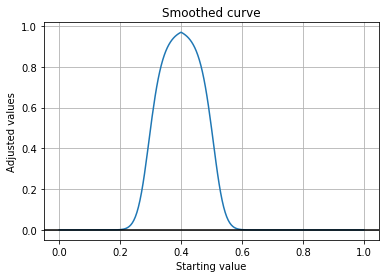

In [103]:
plt.plot(data, final)
plt.title('Smoothed curve'); plt.xlabel('Starting value'); plt.ylabel('Adjusted values')
plt.grid(True, which='both'); plt.axhline(y=0, color='k')
plt.show()